Original image: 612×408, channels=3, dtype=uint8, size=28.53 KB
Compressed copy: image_compressed.jpg
 - size=29.01 KB
 - compression ratio (orig/comp) = 0.98


<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Tatsuya\AppData\Local\Temp\ipykernel_1860\2511757246.py:6: SyntaxWarning: invalid escape sequence '\i'
  img_path = '..\input.jpg'


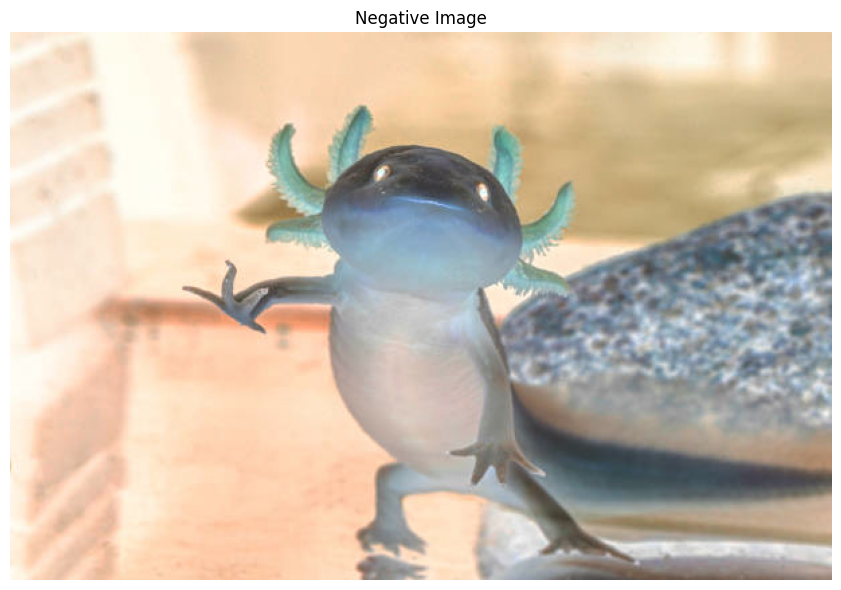

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img_path = '..\input.jpg'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if img is None:
    raise FileNotFoundError(f"Cannot load image at {img_path}")

# image information
h, w = img.shape[:2]
channels = 1 if img.ndim == 2 else img.shape[2]
dtype = img.dtype
orig_size = os.path.getsize(img_path) / 1024
print(f"Original image: {w}×{h}, channels={channels}, dtype={dtype}, size={orig_size:.2f} KB")

# compression and ratio
out_path = 'image_compressed.jpg'
# 85% JPEG quality
cv2.imwrite(out_path, img, [cv2.IMWRITE_JPEG_QUALITY, 85])
comp_size = os.path.getsize(out_path) / 1024
ratio = orig_size / comp_size if comp_size else float('inf')
print(f"Compressed copy: {out_path}")
print(f" - size={comp_size:.2f} KB")
print(f" - compression ratio (orig/comp) = {ratio:.2f}")

# negetive image
neg = 255 - img if img.dtype == np.uint8 else img.max() - img

plt.figure(figsize=(15, 6))

# Negative image
if neg.ndim == 3:
    neg_display = cv2.cvtColor(neg, cv2.COLOR_BGR2RGB)
    plt.imshow(neg_display)
else:
    plt.imshow(neg, cmap='gray')
plt.title("Negative Image")
plt.axis('off')

plt.tight_layout()
plt.show()